In [2]:
import pandas as pd

In [11]:
df=pd.read_csv("/Users/ganeshanbhule/Work/Intellipat/Machine Learning/Dimensionality Reduction/PCA/new/nba_final.csv")

In [12]:
print(df.shape)
df.head()

(1408, 45)


,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No


In [13]:
df.isnull().sum()

Rk               0
Player.x         0
Player_ID        0
Pos1             0
Pos2          1396
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG.              4
X3P              0
X3PA             0
X3P.            99
X2P              0
X2PA             0
X2P.            15
eFG.             4
FT               0
FTA              0
FT.             47
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Salary          62
mean_views     138
Season           0
Conference       0
Role             0
Fvot             0
FRank            0
Pvot           159
PRank          159
Mvot           404
MRank          404
Score            0
Play             0
dtype: int64

In [14]:
df.drop("Pos2",axis=1,inplace=True)

In [15]:
df.fillna(0,inplace=True)

In [16]:
df.drop(["Player.x","Player_ID"],axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Pos1        1408 non-null   object 
 2   Age         1408 non-null   int64  
 3   Tm          1408 non-null   object 
 4   G           1408 non-null   int64  
 5   GS          1408 non-null   int64  
 6   MP          1408 non-null   float64
 7   FG          1408 non-null   float64
 8   FGA         1408 non-null   float64
 9   FG.         1408 non-null   float64
 10  X3P         1408 non-null   float64
 11  X3PA        1408 non-null   float64
 12  X3P.        1408 non-null   float64
 13  X2P         1408 non-null   float64
 14  X2PA        1408 non-null   float64
 15  X2P.        1408 non-null   float64
 16  eFG.        1408 non-null   float64
 17  FT          1408 non-null   float64
 18  FTA         1408 non-null   float64
 19  FT.         1408 non-null  

In [18]:
df.drop(["Pos1","Season","Conference","Tm","Role"],axis=1,inplace=True)

In [19]:
df["Target"]=pd.get_dummies(df["Play"],drop_first=True)
df.drop("Play",axis=1,inplace=True)

In [20]:
#Seperate Features and target variables 

In [21]:
X=df.drop("Target",axis=1)
y=df["Target"]

In [35]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [36]:
#Build logistic regression model using original variables
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
predicted=lr.predict(x_test)


In [40]:
from sklearn.metrics import classification_report
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       401
           1       0.54      0.68      0.60        22

    accuracy                           0.95       423
   macro avg       0.76      0.82      0.79       423
weighted avg       0.96      0.95      0.96       423



# PCA

In [43]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaled_X=sc.fit_transform(X)

In [50]:
## Implement the PCA

from sklearn.decomposition import PCA

p=PCA(n_components=36)

pca_data=p.fit_transform(scaled_X)

In [52]:
p.explained_variance_

array([1.57649641e+01, 3.85923200e+00, 2.61373203e+00, 1.96757583e+00,
       1.87323497e+00, 1.23145095e+00, 1.03035486e+00, 8.84430390e-01,
       8.12513051e-01, 7.53141280e-01, 6.43193675e-01, 5.77572091e-01,
       4.81783743e-01, 4.44428004e-01, 4.20549228e-01, 3.56650493e-01,
       3.46305505e-01, 3.13023387e-01, 2.95102220e-01, 2.63092798e-01,
       2.59630917e-01, 2.28896105e-01, 1.96032859e-01, 1.31127691e-01,
       8.15672250e-02, 5.84608156e-02, 4.75239762e-02, 4.29603131e-02,
       1.78141715e-02, 1.34346567e-02, 8.24656844e-03, 6.91679725e-03,
       2.71635057e-04, 2.25285984e-04, 8.93074094e-05, 5.74592515e-05])

In [59]:
round(pd.Series(p.explained_variance_ratio_)*100,2)

0     43.76
1     10.71
2      7.26
3      5.46
4      5.20
5      3.42
6      2.86
7      2.46
8      2.26
9      2.09
10     1.79
11     1.60
12     1.34
13     1.23
14     1.17
15     0.99
16     0.96
17     0.87
18     0.82
19     0.73
20     0.72
21     0.64
22     0.54
23     0.36
24     0.23
25     0.16
26     0.13
27     0.12
28     0.05
29     0.04
30     0.02
31     0.02
32     0.00
33     0.00
34     0.00
35     0.00
dtype: float64

In [60]:
round(pd.Series(p.explained_variance_ratio_)*100,2).cumsum()

0      43.76
1      54.47
2      61.73
3      67.19
4      72.39
5      75.81
6      78.67
7      81.13
8      83.39
9      85.48
10     87.27
11     88.87
12     90.21
13     91.44
14     92.61
15     93.60
16     94.56
17     95.43
18     96.25
19     96.98
20     97.70
21     98.34
22     98.88
23     99.24
24     99.47
25     99.63
26     99.76
27     99.88
28     99.93
29     99.97
30     99.99
31    100.01
32    100.01
33    100.01
34    100.01
35    100.01
dtype: float64

In [61]:
p=PCA(n_components=13)

pca_data=p.fit_transform(scaled_X)

In [64]:
pca_final=pd.DataFrame(pca_data)

In [66]:
#Train test split

x_train, x_test, y_train, y_test=train_test_split(pca_final,y,test_size=0.3,random_state=20)


In [72]:
#Training the l;ogistic regression model on PCA data

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predicted=lr.predict(x_test)

In [67]:
## Classification report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       395
           1       0.88      0.50      0.64        28

    accuracy                           0.96       423
   macro avg       0.92      0.75      0.81       423
weighted avg       0.96      0.96      0.96       423



# LDA

In [24]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaled_X=sc.fit_transform(X)

In [26]:
scaled_df=pd.DataFrame(scaled_X)

In [37]:
#Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=20)

In [35]:
#Impement the LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
lda=LinearDiscriminantAnalysis(n_components=1)

lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [46]:
print(lda.explained_variance_ratio_)

[1.]


In [65]:
predicted=lda.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       395
           1       0.88      0.50      0.64        28

    accuracy                           0.96       423
   macro avg       0.92      0.75      0.81       423
weighted avg       0.96      0.96      0.96       423



In [70]:
### 
lda=LinearDiscriminantAnalysis(n_components=1)

l1=lda.fit_transform(x_train,y_train)

In [80]:
lda1=pd.Series(l1.T[0])

In [81]:
import matplotlib.pyplot as plt

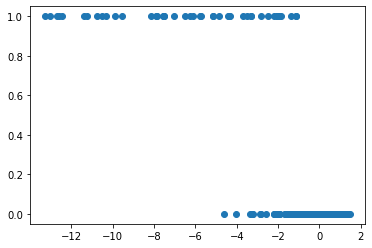

In [83]:
plt.scatter(lda1,y_train)